### Loading the required libraries

In [5]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### Splitting the data into training and testing sets

 - Here, we are loading the dataset directly from the **keras.datasets** using the **load_data()**

In [6]:
(X_train , y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [7]:
len(X_train) # X_train has 60,000 images

60000

In [8]:
len(X_test) # X_test has 10,000 images

10000

In [9]:
X_train[0].shape  
# This line returns the shape of the image in the training set and it is of 28 x 28 pixels

(28, 28)

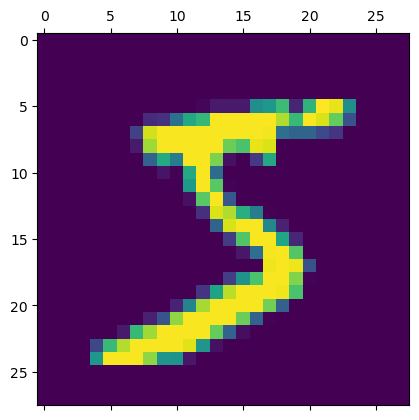

In [10]:
plt.matshow(X_train[0])    
# This line returns the image at position '5' in the training set

In [11]:
y_train[0] 
# This line returns the image at position '5' in the testing set

5

### Scaling the input data (images) to get higher accuracy
- Diving each value(pixel) in the input matrix(image) by 255, since each pixel ranges between 0 - 255

In [12]:
X_train = X_train/255
X_test = X_test/255

In [13]:
# X_train[0]

### Next, we should use the reshape() to convert the 2D images into 1 dimension,before training the model. This process is called 'flatten'

In [14]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [17]:
X_train_flattened.shape
#This gives the shape of the flattened images in the training set. Each imahe has the shape 784 x 1 .i.e. 784 rows and 1 column

(60000, 784)

In [18]:
X_test_flattened.shape   # here 10,000 represents the no. of images in the testing set

(10000, 784)

## Defining the Neural Network
- The below is the template to create and train the neural netwrok
- In the below code:
          - **'10'** represents the no. of neurons in the output layer
          - **input_shape = (784,)** represents that there are 784 neurons in the input layer
          - **'sigmoid'** represents the type of activation function used

In [20]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4706 - accuracy: 0.8765
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3043 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2833 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2731 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2666 - accuracy: 0.9257


- Now, evaluating the model using the test data

In [23]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2656 - accuracy: 0.9263


[0.2655518054962158, 0.9262999892234802]

### Therefore. the accuray opf the model is 92.6% over the test data

## Predicting on test data 
- we are using the predict() to predict the output values of the test data

In [24]:
y_pred = model.predict(X_test_flattened)

In [33]:
y_pred[1] 

array([2.3049298e-01, 1.0200977e-02, 9.9904448e-01, 4.0087280e-01,
       6.9999595e-10, 8.7250602e-01, 8.7662601e-01, 5.8657690e-13,
       1.6799062e-01, 1.6890517e-09], dtype=float32)

In [35]:
np.argmax(y_pred[1])  # This gives the predicted output as a "whole" number

2

In [36]:
y_test[1] # This gives the actual output of in test data 

2

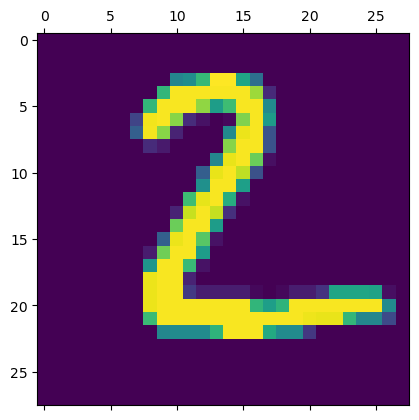

In [37]:
plt.matshow(X_test[1]) # This gives the actual input of in test data 

### Since, the predicted ouput "y_pred" is a vector of decimals, we need to convert all the ouptut vector into whole numbers to get the  confusion matrix

In [38]:
y_pred_labels = [np.argmax(i) for i in y_pred]

In [39]:
y_pred_labels[1]

2

In [40]:
con_matrix = tf.math.confusion_matrix(labels = y_test , predictions = y_pred_labels)

In [41]:
con_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 950,    0,    3,    2,    0,    6,   13,    2,    3,    1],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   3,   10,  919,   19,   10,    5,   14,    9,   39,    4],
       [   1,    0,   13,  920,    0,   30,    3,   10,   24,    9],
       [   1,    1,    2,    1,  917,    0,   12,    3,   11,   34],
       [   7,    3,    2,   24,    8,  793,   14,    3,   31,    7],
       [   7,    3,    5,    1,    7,   11,  919,    2,    3,    0],
       [   1,    5,   22,    8,    9,    1,    0,  940,    4,   38],
       [   3,    9,    5,   18,    9,   30,    9,    8,  875,    8],
       [   8,    7,    1,   10,   27,   11,    1,   17,    7,  920]])>

Text(58.222222222222214, 0.5, 'Truth')

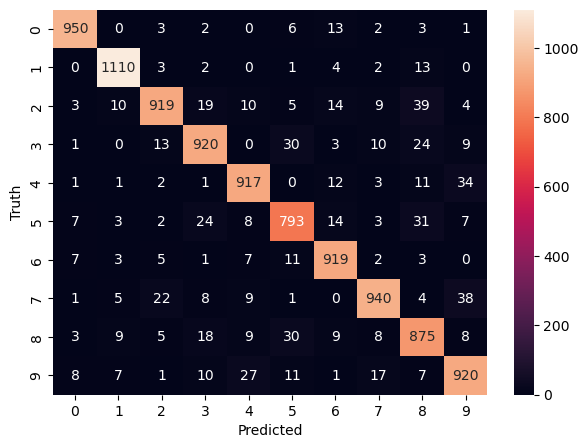

In [42]:
import seaborn as sn
plt.figure(figsize = (7,5))
sn.heatmap(con_matrix, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Now, we will be adding a hidden layer to the neural network and change the activation function to see whether the model improves

In [43]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation='relu'),
    keras.layers.Dense(50,activation='relu'),        # hidden layer
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2579 - accuracy: 0.9252
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1101 - accuracy: 0.9671
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0804 - accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0619 - accuracy: 0.9810
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0481 - accuracy: 0.9846


In [44]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0912 - accuracy: 0.9727


[0.09119080007076263, 0.9726999998092651]

### The accuracy of the model has increased to 97%

Text(58.222222222222214, 0.5, 'Truth')

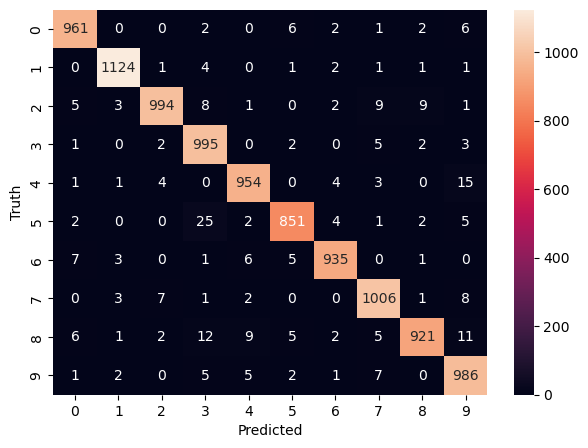

In [45]:
y_pred = model.predict(X_test_flattened)
y_pred_labels = [np.argmax(i) for i in y_pred]

con_matrix = tf.math.confusion_matrix(labels = y_test , predictions = y_pred_labels)

plt.figure(figsize = (7,5))
sn.heatmap(con_matrix, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')